## ECSE 415, Assignment 3 / part 1

 


In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

## 2.1 K-means clustering and Expectation Maximization

1. Implement K-means clustering from scratch. (10 points)
   
   • Apply your implementation of K-means to the provided image with K=2 and K=3. Use R, G, B color channels of the 
     image as three features. Display (a) the segmentation evolving during the first 5 iterations and (b) the final 
     segmentation. (6 points)
   
   • Convert the given image into gray-scale. Apply K-means to the pro- vided image with K=2 and K=3. For every 
     pixel, use gray-scale intensity as feature. Display (a) the segmentation evolving during the first 5 iterations 
     and (b) the final segmentation. (6 points)
  
      • Compare final segmentation maps of color and gray-scale images. Which feature results into better segmentation?      (2 points)
   
   
2. Implement EM from scratch. (15 points)

    • Apply your implementation of EM to the provided image with 2 and 3 Gaussian components. Use R, G, B color 
      channels of the image as three features. Display (a) the segmentation evolving during the first 5 iterations 
      and (b) the final segmentation. (6 points)
   
   • Convert the given image into gray-scale. Apply EM to the provided image with 2 and 3 Gaussian components. For 
      every pixel, use gray- scale intensity as feature. Display (a) the segmentation evolving dur- ing the first 5 
      iterations and (b) the final segmentation. (6 points)
    
    • Compare final segmentation maps of color and gray-scale images. Which feature results into better segmentation? 
      (2 points)
      
      
3. Generate datapoints by copying following code in your jupyter notebook. Cluster these datapoints into two clusters using your implementation of K- means and GMM. Which algorithm performs better and why? (5 points)


In [2]:
#K Means function, TAKES ABOUT 40 SECONDS 
def kmean(img, K, init_tup, iterations):
    centroids = []
    
    #create random centroids
    for i in range(K):
        centroids.append(np.random.randint(0, 256, 3))
    centroids = np.array(centroids)

    for i in range(iterations):
    
        if(3 == K):
           
            # find ecluadian distance between each pixel & the centroids, 
            # then take the indexof the smallest distance. 
            labels = np.array([np.argmin([np.linalg.norm(j-centroids[0]),np.linalg.norm(j-centroids[1]), np.linalg.norm(j-centroids[2])], axis=0)for j in img])
        else:
            # similar the previous one, but with 2 centroids instead of 3
            labels = np.array([np.argmin([np.linalg.norm(j-centroids[0]),np.linalg.norm(j-centroids[1])], axis=0)for j in img])

        centroids = []
        for n in range(K):
            f = img[labels == n]
            centroids.append(np.mean(f, axis=0))
        
        # displaying first 5 iterations
        if i in range(5):
            plt.figure(figsize=(15,15))
            disp = np.asarray([centroids[i] for i in labels]).astype("uint8")
            
            #Gray scale
            if len(init_tup) == 2:
                height, width = init_tup
                x = np.reshape(disp, (height, width))
            # Color RGB
            else:
                height, width, _ = init_tup
                x = np.reshape(disp, (height, width, 3))
                
            plt.subplot(151 + i), plt.imshow(x)
            plt.title("Iteration = " + str(i+1) + ", K = " + str(K) + ", RGB"), plt.xticks([]), plt.yticks([])
            if (len(init_tup) == 2):
                plt.title("Iteration = " + str(i+1) + ", K = " + str(K) + ", GRAY ")
            plt.show()
        
            

    return labels, centroids

  


In [3]:
image = cv2.imread('flower.jpg')

In [4]:
# RGB image for K-mean (it will take time!)
img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
x = img.reshape((-1,3))

# By calling the kmean function, it will do 5 iterations
height, width = img.shape[:2]
l2, c2 = kmean(x, 2, img.shape, 10)
l3, c3 = kmean(x, 3, img.shape, 10)

disp2 = np.asarray([c2[x] for x in l2])
disp3 = np.asarray([c3[x] for x in l3])

im2 = np.reshape(disp2, (height, width, 3)).astype("uint8")
im3 = np.reshape(disp3, (height, width, 3)).astype("uint8")

# Display final segmentation 
plt.figure(figsize=(15,15))
plt.subplot(221), plt.imshow(im2)
plt.title('Final segmentation, K = 2, RGB Image'), plt.xticks([]), plt.yticks([])
plt.subplot(222), plt.imshow(im3)
plt.title('Final segmentation, K = 3, RGB Image'), plt.xticks([]), plt.yticks([])
plt.show()





error: OpenCV(3.4.2) /Users/travis/build/skvark/opencv-python/opencv/modules/imgproc/src/color.hpp:253: error: (-215:Assertion failed) VScn::contains(scn) && VDcn::contains(dcn) && VDepth::contains(depth) in function 'CvtHelper'


In [5]:
#Gray image for K-mean (it will take time!)
#It might not work for K=2 or k=3 first few runs, but it will definitely work eventualy.
#thank you for your patience! :)

img_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
img_gray = img_gray[:, :, None]
img_gray = cv2.resize(img_gray, None, fx=0.5, fy=0.5)

x1 = img_gray.reshape(-1)
height_g, width_g = img_gray.shape[:2]

# By calling the kmean function, it will do 5 iterations
lg2, cg2 = kmean(x1, 2, img_gray.shape, 10)
lg3, cg3 = kmean(x1, 3, img_gray.shape, 10)

im2_g = np.reshape(lg2, (height_g, width_g))
im3_g = np.reshape(lg3, (height_g, width_g))

# Display final segmentation 
plt.figure(figsize=(15,15))
plt.subplot(221), plt.imshow(im2_g)
plt.title('Final segmentation, K = 2, Gray Image'), plt.xticks([]), plt.yticks([])
plt.subplot(222), plt.imshow(im3_g)
plt.title('Final segmentation, K = 3, Gray Image'), plt.xticks([]), plt.yticks([])
plt.show()



error: OpenCV(3.4.2) /Users/travis/build/skvark/opencv-python/opencv/modules/imgproc/src/color.hpp:253: error: (-215:Assertion failed) VScn::contains(scn) && VDcn::contains(dcn) && VDepth::contains(depth) in function 'CvtHelper'


## Compare final segmentation maps of color and gray-scale images. Which feature results into better segmentation?
 Gray-scale would give a better segmentation if we consider "better" as to have more details shown when segmenting. 

In [6]:
#Expectation Maximaization function, TAKES ABOUT A LOT MORE THAN 40 SECONDS (sometimes) 


# calculating the variance of a given image
def calculate_gaussian(x, mean, var):
    #Gaussian gaussian distribution equation
    return (1 / (np.sqrt(2*np.pi) * np.sqrt(var))) * np.exp(-((x - mean)**2) / (2*var))
    
# compressing an array to 1/3 of its size (only used for RGB here, because of 3 dimentions)
def compress(arr):
    final = []
    i = 0
    while i < (len(arr)-2):
        final.append(int(np.median(arr[i:i+3], axis=0)))
        i += 3
    return np.array(final)
    
    
# finding the labels and centroids of an image 
def EM(img, K, init_tup, iterations):
    #flatten image, convert to one long array
    img = img.flatten()
    
    # random clustering
    prev_idx = 0
    labels = np.zeros_like(img)
    for k in range(K):
        idx = (1/K) * 255 * (k+1)
        labels[np.where((img >= prev_idx) & (img < idx))] = k
        prev_idx = idx
    
    
    for i in range(iterations):
        mu = [] # means
        var = [] # variances
        alpha = [] # gaussian weighing factors
        for k in range(K):
            X = img[np.where(labels==k)[0]]
            mu.append(np.mean(X))
            var.append(np.var(X))
            alpha.append(len(X) / len(img))

        # Expectation
        probs = np.array([calculate_gaussian(img, mu[n], var[n]) for n in range(K)]).T
        probs *= alpha
        for row in probs:
            row /= sum(row)
        labels = np.argmax(probs, axis=1)

        
    
         # Displaying first 5 iterations.
         # For the images dispayed only in this part, I was not able to find the accurate result
         # due to the difficulty of the problem and time constraint, however the final segmentation of 
         # my EM function works perfectly.
    for j in range(5):
            plt.figure(figsize=(15,15))
            disp = np.asarray([mu[j] for j in labels]).astype("uint8")
            
            #Gray scale
            if len(init_tup) == 2:
                height, width = init_tup
                x = np.reshape(disp, (height, width))
                
            # Color RGB
            else:
                height, width, _ = init_tup
                x = np.reshape(disp, (height, width, 3))
                
            plt.subplot(151 + j), plt.imshow(x)
            plt.title("Iteration = " + str(j+1) + ", K = " + str(K) + ", RGB"), plt.xticks([]), plt.yticks([])
            if (len(init_tup) == 2):
                plt.title("Iteration = " + str(j+1) + ", K = " + str(K) + ", GRAY ")
            plt.show()


    return mu, labels




In [7]:
image = cv2.imread('flower.jpg')

In [8]:
# RGB image for EM (it will take time!)

img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, None, fx=0.5, fy=0.5)

height, width = img.shape[:2]

# find labels and centroids using EM (by calling EM it will do 5 iterations)
centroids2gx, labels2gx = EM(img, 2, img.shape, 10)
centroids3gx, labels3gx = EM(img, 3, img.shape, 10)


#reshape labels to the shape of the image
img_label2gx = np.reshape(compress(labels2gx), (height, width))
img_label3gx = np.reshape(compress(labels3gx), (height, width))



# display final segmentation
plt.figure(figsize=(15,15))
plt.subplot(221), plt.imshow(img_label2gx)
plt.title('Final segmentation, K = 2, RGB Image'), plt.xticks([]), plt.yticks([])
plt.subplot(222), plt.imshow(img_label3gx)
plt.title('Final segmentation, K = 3, RGB Image'), plt.xticks([]), plt.yticks([])
plt.show()

error: OpenCV(3.4.2) /Users/travis/build/skvark/opencv-python/opencv/modules/imgproc/src/color.hpp:253: error: (-215:Assertion failed) VScn::contains(scn) && VDcn::contains(dcn) && VDepth::contains(depth) in function 'CvtHelper'


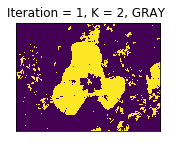

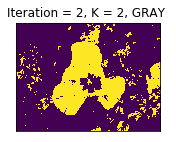

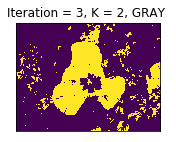

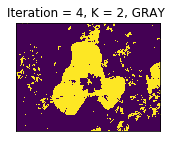

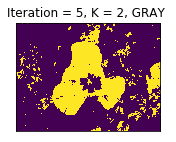

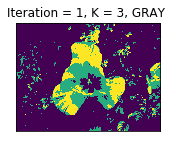

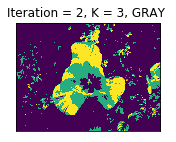

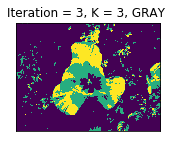

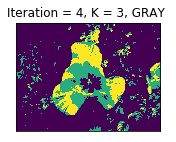

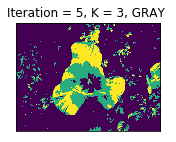

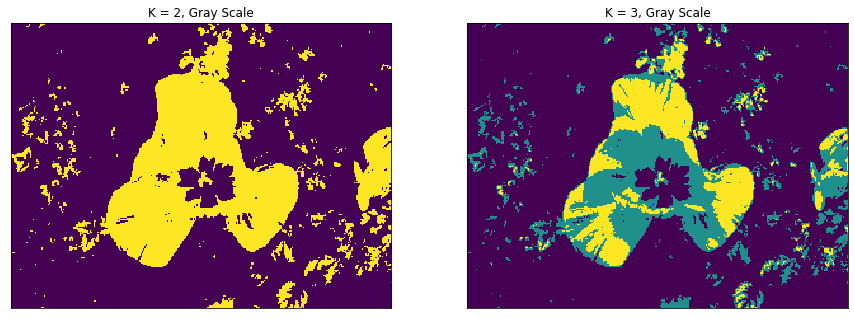

In [54]:
# GRAY image for EM (it will take time!)

img_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
img_gray = img_gray[:, :, None]
img_gray = cv2.resize(img_gray, None, fx=0.5, fy=0.5)

height2, width2 = img_gray.shape[:2]

# find labels and centroids using EM (by calling EM it will do 5 iterations)
centroids22gx, labels22gx = EM(img_gray, 2, img_gray.shape, 10)
centroids23gx, labels23gx = EM(img_gray, 3, img_gray.shape, 10)

img_gray = np.reshape(img_gray, img_gray.shape[0]*img_gray.shape[1])


#reshape labels to the shape of the image
img_label22gx = np.reshape(labels22gx, (height2, width2))
img_label23gx = np.reshape(labels23gx, (height2, width2))


# display final segmentation
plt.figure(figsize=(15,15))
plt.subplot(221), plt.imshow(img_label22gx)
plt.title('K = 2, Gray Scale'), plt.xticks([]), plt.yticks([])
plt.subplot(222), plt.imshow(img_label23gx)
plt.title('K = 3, Gray Scale'), plt.xticks([]), plt.yticks([])
plt.show()


## Compare final segmentation maps of color and gray-scale images. Which feature results into better segmentation? 
In this case it is hard to say. for k=2 we get more segmentation for RGB but for K=3 Gray-scale would give a better results. Again, it is hard to  mention which one is better as in each run we get different images and it also depends on how we define "better segmentation" (i.e. more details, edge detection,...) 

K-means Results


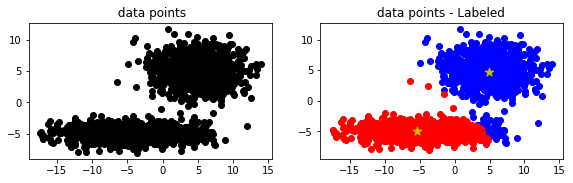

GMM Results


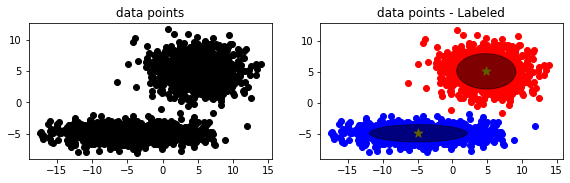

In [58]:
from sklearn import mixture
import matplotlib as mpl
import numpy as np 

# Following code generates datapoints for question 1.1 part 3.

data = np.float32(
            np.vstack((
                np.random.normal(
                    loc =np.array([5, 5]),
                    scale = np.array([3, 2]),
                    size =(1000,2)), 
                np.random.normal(
                    loc = np.array([-5,-5]), 
                    scale = np.array([5, 1]),
                    size = (1000,2)))))



# This part has been done with the help of tutorial code.

# K-means 
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1)
compactness, labels, centers = cv2.kmeans(data, 2, None, criteria, 10, flags=cv2.KMEANS_RANDOM_CENTERS)

A = data[labels.ravel()==0]
B = data[labels.ravel()==1]

plt.figure(figsize=(20,2.5))
plt.subplot(141)
plt.plot(data[:,0], data[:,1],"ko")
print("K-means Results")
plt.title(" data points")
plt.subplot(142)
plt.scatter(A[:,0], A[:,1], color='b')
plt.scatter(B[:,0], B[:,1], color='r')
plt.scatter(centers[:,0], centers[:,1], s=80, color='y', marker='*')
plt.title("data points - Labeled")

plt.show()

# GMM 

# A helper function to draw variance
def make_ellipses(gmm, ax):
    K = gmm.means_.shape[0]
    for n in range(K):
        if gmm.covariance_type == 'full':
            covariances = gmm.covariances_[n][:2, :2]
        elif gmm.covariance_type == 'tied':
            covariances = gmm.covariances_[:2, :2]
        elif gmm.covariance_type == 'diag':
            covariances = np.diag(gmm.covariances_[n][:2])
        elif gmm.covariance_type == 'spherical':
            covariances = np.eye(gmm.means_.shape[1]) * gmm.covariances_[n]
        v, w = np.linalg.eigh(covariances)
        u = w[0] / np.linalg.norm(w[0])
        angle = np.arctan2(u[1], u[0])
        angle = 180 * angle / np.pi  # convert to degrees
        v = 2. * np.sqrt(2.) * np.sqrt(v)
        ell = mpl.patches.Ellipse(gmm.means_[n, :2], v[0], v[1],
                                  180 + angle, color='black')
        ell.set_clip_box(ax.bbox)
        ell.set_alpha(0.5)
        ax.add_artist(ell)
        
# defining a GMM class
clf = mixture.GaussianMixture(n_components=2, covariance_type='full')

# fitting GMM on train data
clf.fit(data)

# the centers of the fitted GMM
centers = clf.means_

# predict cluster membership from the fitted GMM 
label = clf.predict(data)

A = data[label==0]
B = data[label==1]

plt.figure(figsize=(20,2.5))
plt.subplot(141)
plt.plot(data[:,0], data[:,1],"ko")
print("GMM Results")
plt.title("data points")
h = plt.subplot(142)
plt.scatter(A[:,0], A[:,1], color='b')
plt.scatter(B[:,0], B[:,1], color='r')
plt.scatter(centers[:,0], centers[:,1], s=80, color='y', marker='*')
make_ellipses(clf, h)
plt.title("data points - Labeled")

plt.show()


## which algorithm performs better and why?
The EM clustering method can show a higher accuracy of the results with a higher speed. We can acheive the highest accuracy with K-means algorithm, but it would be more time-consuming than EM. To reduce the time, further optimizations should be carried out.

## 2.2 Normalized graph-cut and Mean-Shift segmentation


      • Segment the given image using normalized graph-cuts. Vary 
        the follow- ing parameters (try several values of 
        each parameter): compactness and n segments (slic  
        function), thresh (cut normalized function). Display seg- 
        mentation results for several parameters and state their 
        effect on the out- put. (8 points)
        
      • Segment the given image using mean-shift. Vary the 
        following parameters (try several values of each 
        parameter): ratio, kernel size, max dist. Dis- play 
        segmentation results for several parameters and state 
        their effect on the output. (8 points)


In [59]:
from matplotlib import pyplot as plt
from skimage import segmentation, color
from skimage.future import graph
from skimage.segmentation import quickshift


Compactness Variation


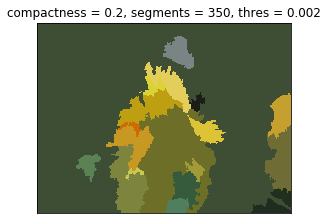

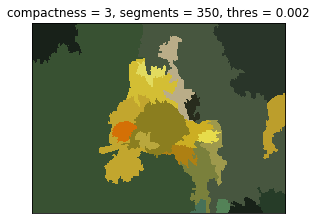

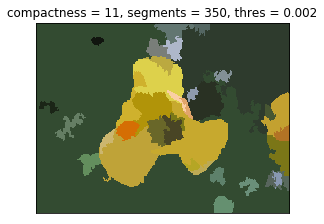



 n_segments Variation


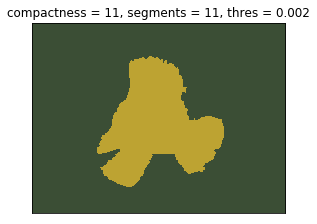

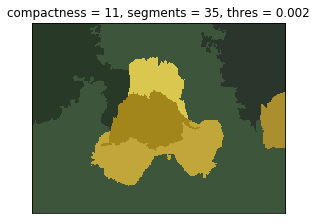

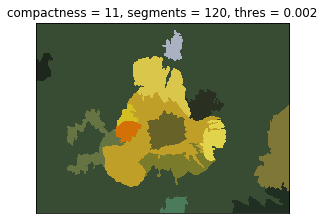



 THRESHOLD Variation


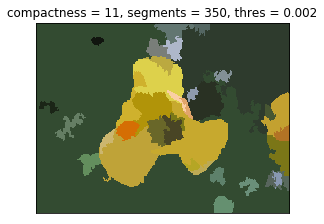

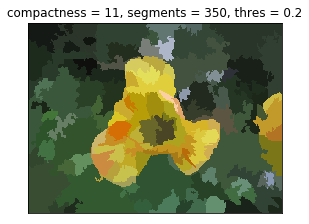

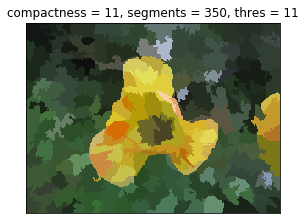

In [62]:
# Normalized Graph cut

# Loading image
image = cv2.cvtColor(cv2.imread('flower.jpg'), cv2.COLOR_BGR2RGB)

# Normalized graph-cut function
def norm_cut(img, compactness, segments, threshold):
    labels1 = segmentation.slic(img, compactness=compactness, n_segments=segments)
    out1 = color.label2rgb(labels1, img, kind='avg')
    
    # apply graph cut
    g = graph.rag_mean_color(img, labels1, mode='similarity')
    labels2 = graph.cut_normalized(labels1, g, thresh=threshold)
    out2 = color.label2rgb(labels2, img, kind='avg')

    # display all results 
    plt.figure(figsize=(10,10))
    plt.subplot(121), plt.imshow(out2)
    plt.title("compactness = " + str(compactness) + ", segments = " + str(segments) + ", thres = " + str(threshold))
    plt.xticks([]), plt.yticks([])
    plt.show()

# calling for each parameter which is going to display the result by norm_cut function
print('Compactness Variation')
norm_cut(img, 0.2, 350, 0.002)
norm_cut(img, 3, 350, 0.002)
norm_cut(img, 11, 350, 0.002)

print('\n\n n_segments Variation')
norm_cut(img, 11, 11, 0.002)
norm_cut(img, 11, 35, 0.002)
norm_cut(img, 11, 120, 0.002)

print('\n\n THRESHOLD Variation')
norm_cut(img, 11, 350, 0.002)
norm_cut(img, 11, 350, 0.2)
norm_cut(img, 11, 350, 11)

MANIPULATE ratio Variation


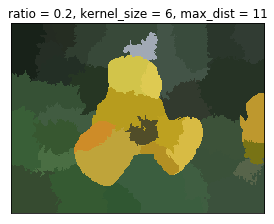

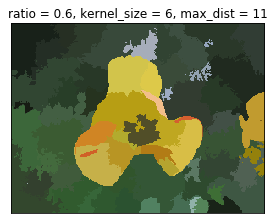

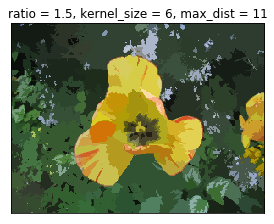



 MANIPULATE kernel_size Variation


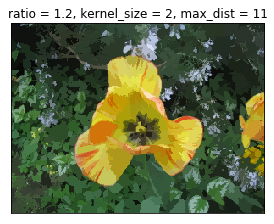

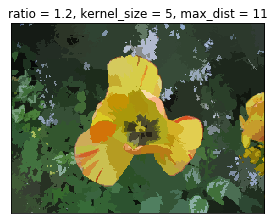

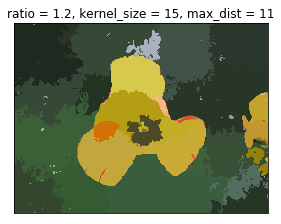



 max_dist Variation


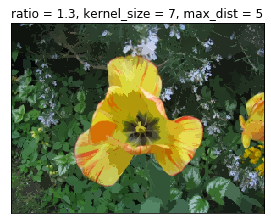

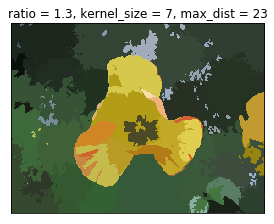

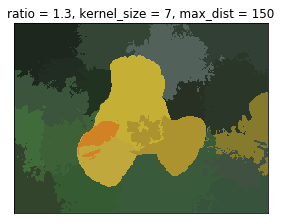

In [63]:
#MEAN SHIFT SEGMENTATION

# Mean shift function
def mean_shift(img, ratio, kernel, max_dist):
    label = quickshift(img, ratio = ratio, kernel_size = kernel, max_dist=max_dist)
    out = color.label2rgb(label, img, kind='avg')
    
    # display all results 
    plt.figure(figsize=(10,5))
    plt.subplot(121), plt.imshow(out)
    plt.title("ratio = " + str(ratio) + ", kernel_size = " + str(kernel) + ", max_dist = " + str(max_dist))
    plt.xticks([]), plt.yticks([])
    plt.show()

    




print('MANIPULATE ratio Variation')
mean_shift(img, 0.2, 6, 11)
mean_shift(img, 0.6, 6, 11)
mean_shift(img, 1.5, 6, 11)

print('\n\n MANIPULATE kernel_size Variation')
mean_shift(img, 1.2, 2, 11)
mean_shift(img, 1.2, 5, 11)
mean_shift(img, 1.2, 15, 11)

print('\n\n max_dist Variation')
mean_shift(img, 1.3, 7, 5)
mean_shift(img, 1.3, 7, 23)
mean_shift(img, 1.3, 7, 150)

for normalized graph cut =>
compactness:
Higher values give more weight to space proximity, making superpixel shapes more cubic.
n_segments:
More n_segments mean the pixels are segmented into more groups.
threshold:
Large threshold leaves a more superpixels. Low threshold merges\connects more superpixels.

for mean shift =>
ratio:
Higher values give more weight to color-space.
kernel_size:
Higher means fewer clusters.
max_dist:
Higher means fewer clusters.